# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from sklearn.ensemble import IsolationForest

# Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
ev= pd.read_csv('C:\\Users\\Himani\\Desktop\\pp/data.csv')

In [3]:
# print first 5 rows in the dataframe
ev.head()

,id,clusterId,Date,connectionTime,Num. Rep.,disconnectTime,Time Diff,Session Length,Avg.Sess.,donechargingTime,...,userID,Precip Type,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar),Daily summary
0,5bc90cb9f9af8b0d7fe77cd2,39,"Wed, 25 Apr 2018",11:08:04,11.13,13:20:10 GMT,02:12:06,2.20,5.659264,"Wed, 25 Apr 2018 13:21:10 GMT",...,NaN,rain,24.372222,34.846153,13.54,300,9.9015,0,1004.55,Mostly cloudy .
1,5bc90cb9f9af8b0d7fe77cd3,39,"Wed, 25 Apr 2018",13:45:10,13.75,00:56:16 GMT,11:11:06,11.19,5.670872,"Wed, 25 Apr 2018 16:44:15 GMT",...,NaN,rain,24.372222,34.846153,13.54,300,9.9015,0,1004.55,Mostly cloudy .
2,5bc90cb9f9af8b0d7fe77cd4,39,"Wed, 25 Apr 2018",13:45:50,13.76,23:04:45 GMT,10:19:45,10.33,5.652290,"Wed, 25 Apr 2018 14:51:44 GMT",...,NaN,rain,24.372222,34.846153,13.54,300,9.9015,0,1004.55,Mostly cloudy .
3,5bc90cb9f9af8b0d7fe77cd5,39,"Wed, 25 Apr 2018",14:37:06,14.62,23:55:34 GMT,09:18:28,9.31,5.636486,"Wed, 25 Apr 2018 16:05:22 GMT",...,NaN,rain,24.372222,34.846153,13.54,300,9.9015,0,1004.55,Mostly cloudy .
4,5bc90cb9f9af8b0d7fe77cd6,39,"Wed, 25 Apr 2018",14:40:34,14.68,23:03:12 GMT,08:22:38,8.38,5.624034,"Wed, 25 Apr 2018 17:40:30 GMT",...,NaN,rain,24.372222,34.846153,13.54,300,9.9015,0,1004.55,Mostly cloudy .


In [4]:
# print last 5 rows of the dataframe
ev.tail()

,id,clusterId,Date,connectionTime,Num. Rep.,disconnectTime,Time Diff,Session Length,Avg.Sess.,donechargingTime,...,userID,Precip Type,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar),Daily summary
294,5bc9160af9af8b0dad3c06a8,39,"Tue, 01 May 2018",16:52:54,16.88,01:05:41 GMT,08:12:37,8.21,6.548000,"Tue, 01 May 2018 19:11:06 GMT",...,NaN,rain,28.511111,38.763024,12.4883,339,16.1,0,1009.55,Mostly cloudy
295,5bc9160af9af8b0dad3c06a9,39,"Tue, 01 May 2018",16:58:54,16.98,01:05:19 GMT,08:06:25,8.11,6.132500,"Tue, 01 May 2018 23:54:46 GMT",...,NaN,rain,28.511111,38.763024,12.4883,339,16.1,0,1009.55,Mostly cloudy
296,5bc9160af9af8b0dad3c06aa,39,"Tue, 01 May 2018",17:09:09,17.15,00:22:14 GMT,07:13:05,7.22,5.473333,"Tue, 01 May 2018 18:46:19 GMT",...,NaN,rain,28.511111,38.763024,12.4883,339,16.1,0,1009.55,Mostly cloudy
297,5bc9160af9af8b0dad3c06ab,39,"Tue, 01 May 2018",17:11:32,17.19,20:10:03 GMT,02:58:31,2.98,4.600000,"Tue, 01 May 2018 20:09:58 GMT",...,NaN,rain,28.511111,38.763024,12.4883,339,16.1,0,1009.55,Mostly cloudy
298,5bc9160af9af8b0dad3c06ac,39,"Tue, 01 May 2018",17:28:59,17.48,23:42:22 GMT,06:13:23,6.22,6.220000,"Tue, 01 May 2018 23:42:19 GMT",...,NaN,rain,28.511111,38.763024,12.4883,339,16.1,0,1009.55,Mostly cloudy


In [5]:
# number of rows and columns
ev.shape

(299, 27)

In [6]:
# getting some basic informations about the data
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     299 non-null    object 
 1   clusterId              299 non-null    int64  
 2   Date                   299 non-null    object 
 3   connectionTime         299 non-null    object 
 4   Num. Rep.              299 non-null    float64
 5   disconnectTime         299 non-null    object 
 6   Time Diff              299 non-null    object 
 7   Session Length         299 non-null    float64
 8   Avg.Sess.              299 non-null    float64
 9   donechargingTime       298 non-null    object 
 10  kWhDelivered           299 non-null    float64
 11  Avg. Consump           299 non-null    float64
 12  sessionId              299 non-null    object 
 13  siteId                 299 non-null    int64  
 14  spaceID                299 non-null    object 
 15  statio

In [7]:
# checking the number of missing values
ev.isnull().sum()

id                         0
clusterId                  0
Date                       0
connectionTime             0
Num. Rep.                  0
disconnectTime             0
Time Diff                  0
Session Length             0
Avg.Sess.                  0
donechargingTime           1
kWhDelivered               0
Avg. Consump               0
sessionId                  0
siteId                     0
spaceID                    0
stationID                  0
timezone                   0
userID                   298
Precip Type                0
temperature                0
Avg. Humidity              0
Avg Wind Speed(mph)        0
Wind Bearing(degrees)      0
Visibility(km)             0
Loud Cover                 0
Pressure(millibar)         0
Daily summary              0
dtype: int64

In [8]:
ev["donechargingTime"] = ev["donechargingTime"].fillna(ev["donechargingTime"].mode()[0])

In [9]:
NAs = pd.concat([ev.isnull().sum()], axis=1, keys=["EV"])
NAs[NAs.sum(axis=1) > 0]

,EV
userID,298


In [10]:
ev.pop("userID")

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
294   NaN
295   NaN
296   NaN
297   NaN
298   NaN
Name: userID, Length: 299, dtype: float64

#How does data look matematically

In [11]:
ev.describe()

,clusterId,Num. Rep.,Session Length,Avg.Sess.,kWhDelivered,Avg. Consump,siteId,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
count,299.0,299.000000,299.000000,299.000000,299.000000,299.000000,299.0,299.000000,299.000000,299.000000,299.000000,299.000000,299.0,299.000000
mean,39.0,14.055920,5.659264,5.863428,8.880215,9.077592,2.0,26.075790,35.486688,12.205524,216.675585,14.784162,0.0,1012.212542
std,0.0,6.491128,3.649564,0.664461,7.517564,0.629821,0.0,1.405486,1.471998,1.271501,113.151907,2.130799,0.0,4.072541
min,39.0,0.040000,0.100000,4.600000,0.546000,6.480000,2.0,24.372222,33.836492,10.236100,10.000000,9.901500,0.0,1004.550000
25%,39.0,13.905000,2.345000,5.413281,3.507000,8.635000,2.0,24.844444,34.846153,11.076800,124.000000,14.168000,0.0,1009.550000
50%,39.0,15.920000,5.200000,5.549357,6.764000,9.110000,2.0,25.416667,34.864321,12.075100,271.000000,15.729700,0.0,1011.920000
75%,39.0,17.685000,8.605000,6.285223,12.951500,9.485000,2.0,27.383333,35.872643,13.540000,300.000000,16.100000,0.0,1015.720000
max,39.0,23.900000,18.170000,8.207187,47.808000,11.770000,2.0,28.511111,38.763024,14.021400,339.000000,16.100000,0.0,1016.850000


In [12]:
#Are there duplicate values
ev.duplicated().sum()

0

In [13]:
#How is the correlation between columns
ev.corr()

C:\Users\Himani\AppData\Local\Temp\ipykernel_32704\4186223021.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ev.corr()


,clusterId,Num. Rep.,Session Length,Avg.Sess.,kWhDelivered,Avg. Consump,siteId,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
clusterId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num. Rep.,NaN,1.000000,-0.006438,-0.105431,-0.060010,-0.151705,NaN,-0.192787,-0.109221,0.124439,-0.082490,-0.184083,NaN,-0.076314
Session Length,NaN,-0.006438,1.000000,0.136738,0.310325,0.068062,NaN,0.150531,0.210982,0.071906,0.143226,-0.086973,NaN,-0.116158
Avg.Sess.,NaN,-0.105431,0.136738,1.000000,-0.028790,-0.306549,NaN,0.597536,0.743543,0.441166,-0.095027,0.324415,NaN,-0.032252
kWhDelivered,NaN,-0.060010,0.310325,-0.028790,1.000000,0.136078,NaN,-0.088631,-0.066617,-0.014799,-0.060507,0.071274,NaN,0.077324
Avg. Consump,NaN,-0.151705,0.068062,-0.306549,0.136078,1.000000,NaN,0.007092,0.010471,-0.627740,0.578792,-0.097441,NaN,-0.061571
siteId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,NaN,-0.192787,0.150531,0.597536,-0.088631,0.007092,NaN,1.000000,0.734907,-0.111375,0.232455,0.574416,NaN,0.028210
Avg. Humidity,NaN,-0.109221,0.210982,0.743543,-0.066617,0.010471,NaN,0.734907,1.000000,0.113319,0.348580,0.203647,NaN,-0.092720
Avg Wind Speed(mph),NaN,0.124439,0.071906,0.441166,-0.014799,-0.627740,NaN,-0.111375,0.113319,1.000000,-0.494134,-0.212482,NaN,-0.211034


In [14]:
correlation = ev.corr()

C:\Users\Himani\AppData\Local\Temp\ipykernel_32704\1113734809.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ev.corr()


<Axes: >

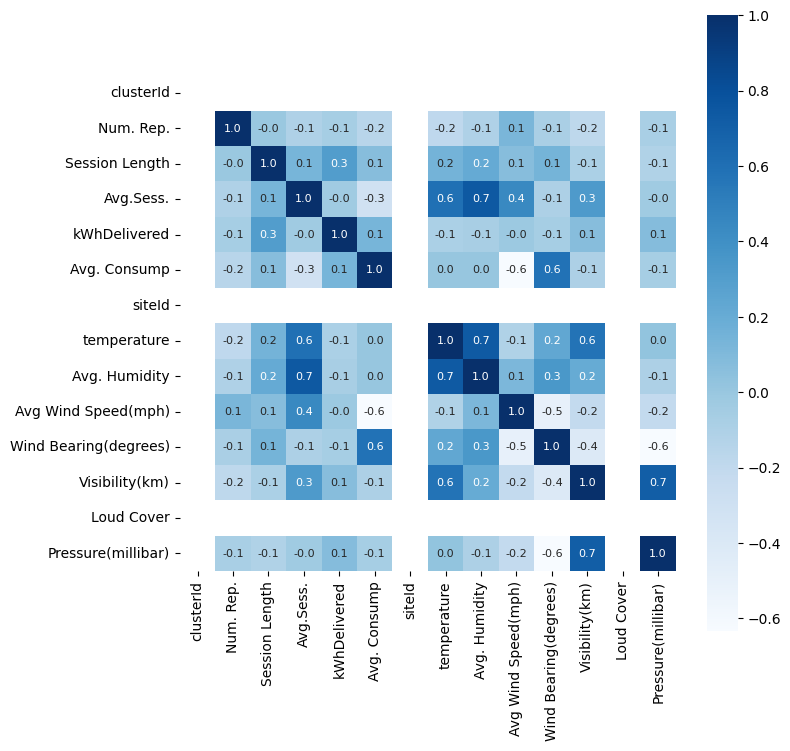

In [15]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
print(correlation['Session Length'])

clusterId                     NaN
Num. Rep.               -0.006438
Session Length           1.000000
Avg.Sess.                0.136738
kWhDelivered             0.310325
Avg. Consump             0.068062
siteId                        NaN
temperature              0.150531
Avg. Humidity            0.210982
Avg Wind Speed(mph)      0.071906
Wind Bearing(degrees)    0.143226
Visibility(km)          -0.086973
Loud Cover                    NaN
Pressure(millibar)      -0.116158
Name: Session Length, dtype: float64


C:\Users\Himani\AppData\Local\Temp\ipykernel_32704\557120452.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev['Session Length'],color='green')


<Axes: xlabel='Session Length', ylabel='Density'>

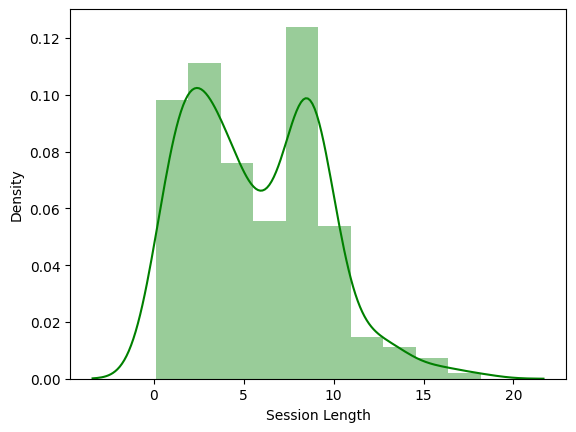

In [17]:
sns.distplot(ev['Session Length'],color='green')

In [18]:
print(correlation['kWhDelivered'])

clusterId                     NaN
Num. Rep.               -0.060010
Session Length           0.310325
Avg.Sess.               -0.028790
kWhDelivered             1.000000
Avg. Consump             0.136078
siteId                        NaN
temperature             -0.088631
Avg. Humidity           -0.066617
Avg Wind Speed(mph)     -0.014799
Wind Bearing(degrees)   -0.060507
Visibility(km)           0.071274
Loud Cover                    NaN
Pressure(millibar)       0.077324
Name: kWhDelivered, dtype: float64


C:\Users\Himani\AppData\Local\Temp\ipykernel_32704\3648164053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev['kWhDelivered'],color='pink')


<Axes: xlabel='kWhDelivered', ylabel='Density'>

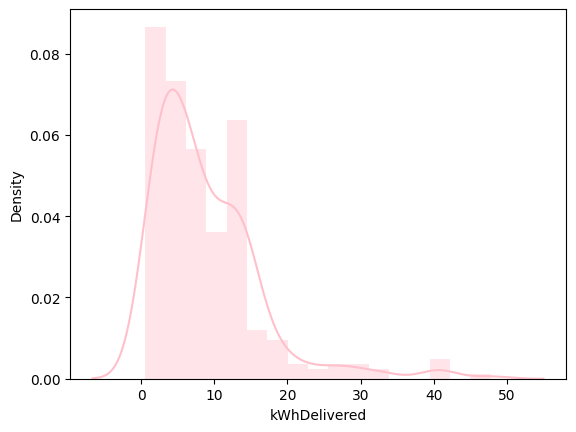

In [19]:
sns.distplot(ev['kWhDelivered'],color='pink')

In [20]:
ev.drop(['id','clusterId','Date','connectionTime','sessionId','spaceID','stationID','disconnectTime','siteId','Time Diff','donechargingTime','timezone','Precip Type','Loud Cover','Daily summary'],axis=1,inplace=True)

<Axes: >

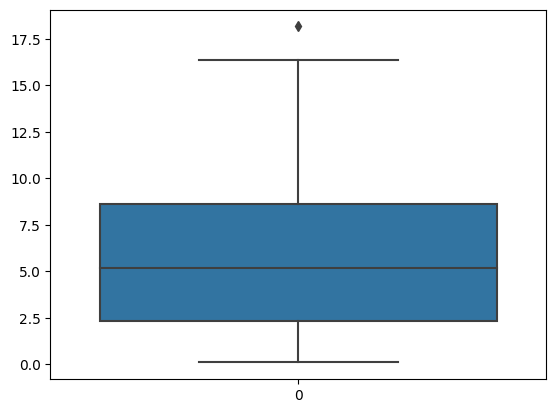

In [21]:
#Boxplot
sns.boxplot(ev['Session Length'])

In [22]:
model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.02),max_features=1.0)
model.fit(ev[['Session Length']])

C:\Users\Himani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02, n_estimators=1000)

In [23]:
ev['newlength']=model.decision_function(ev[['Session Length']])
ev['anomaly']=model.predict(ev[['Session Length']])
ev.head(10)

,Num. Rep.,Session Length,Avg.Sess.,kWhDelivered,Avg. Consump,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),newlength,anomaly
0,11.13,2.20,5.659264,7.932,8.88,24.372222,34.846153,13.54,300,9.9015,1004.55,0.176226,1
1,13.75,11.19,5.670872,10.013,8.88,24.372222,34.846153,13.54,300,9.9015,1004.55,0.045227,1
2,13.76,10.33,5.652290,5.257,8.88,24.372222,34.846153,13.54,300,9.9015,1004.55,0.103445,1
3,14.62,9.31,5.636486,5.177,8.89,24.372222,34.846153,13.54,300,9.9015,1004.55,0.174156,1
4,14.68,8.38,5.624034,10.119,8.90,24.372222,34.846153,13.54,300,9.9015,1004.55,0.185632,1
5,14.73,10.56,5.614660,7.910,8.90,24.372222,34.846153,13.54,300,9.9015,1004.55,0.096962,1
6,14.80,3.67,5.597782,15.294,8.90,24.372222,34.846153,13.54,300,9.9015,1004.55,0.145945,1
7,14.97,4.13,5.604384,6.953,8.88,24.372222,34.846153,13.54,300,9.9015,1004.55,0.166939,1
8,15.18,3.08,5.609450,2.174,8.89,24.372222,34.846153,13.54,300,9.9015,1004.55,0.138980,1
9,15.20,3.29,5.618172,2.439,8.91,24.372222,34.846153,13.54,300,9.9015,1004.55,0.163185,1


In [24]:
outliers_counter = len(ev[ev['anomaly'] ==-1])
outliers_counter 

6

In [25]:
ev_data = ev[(ev['anomaly'] ==1)]

In [26]:
ev_data

,Num. Rep.,Session Length,Avg.Sess.,kWhDelivered,Avg. Consump,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),newlength,anomaly
0,11.13,2.20,5.659264,7.932,8.88,24.372222,34.846153,13.5400,300,9.9015,1004.55,0.176226,1
1,13.75,11.19,5.670872,10.013,8.88,24.372222,34.846153,13.5400,300,9.9015,1004.55,0.045227,1
2,13.76,10.33,5.652290,5.257,8.88,24.372222,34.846153,13.5400,300,9.9015,1004.55,0.103445,1
3,14.62,9.31,5.636486,5.177,8.89,24.372222,34.846153,13.5400,300,9.9015,1004.55,0.174156,1
4,14.68,8.38,5.624034,10.119,8.90,24.372222,34.846153,13.5400,300,9.9015,1004.55,0.185632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,16.88,8.21,6.548000,7.799,7.71,28.511111,38.763024,12.4883,339,16.1000,1009.55,0.188066,1
295,16.98,8.11,6.132500,11.304,7.68,28.511111,38.763024,12.4883,339,16.1000,1009.55,0.184697,1
296,17.15,7.22,5.473333,1.943,6.48,28.511111,38.763024,12.4883,339,16.1000,1009.55,0.142226,1
297,17.19,2.98,4.600000,7.053,8.74,28.511111,38.763024,12.4883,339,16.1000,1009.55,0.150762,1


#Splitting the features and target

In [27]:
X = ev_data.drop(['Session Length','newlength','anomaly'],axis=1)
Y = ev_data['Session Length']

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X)

StandardScaler()

In [30]:
standardized_data = scaler.transform(X)

In [31]:
print(standardized_data)

[[-0.48228634 -0.3128762  -0.09421551 ...  0.72706786 -2.26841502
  -1.86721999]
 [-0.07265618 -0.29514123  0.20272138 ...  0.72706786 -2.26841502
  -1.86721999]
 [-0.07109271 -0.32353199 -0.47590997 ...  0.72706786 -2.26841502
  -1.86721999]
 ...
 [ 0.45892495 -0.59693904 -0.94878303 ...  1.0707087   0.62618642
  -0.64277234]
 [ 0.46517884 -1.93120661 -0.21963959 ...  1.0707087   0.62618642
  -0.64277234]
 [ 0.51051958  0.54380881  0.26222291 ...  1.0707087   0.62618642
  -0.64277234]]


In [32]:
X = standardized_data
Y = ev_data['Session Length']

In [33]:
print(X)

[[-0.48228634 -0.3128762  -0.09421551 ...  0.72706786 -2.26841502
  -1.86721999]
 [-0.07265618 -0.29514123  0.20272138 ...  0.72706786 -2.26841502
  -1.86721999]
 [-0.07109271 -0.32353199 -0.47590997 ...  0.72706786 -2.26841502
  -1.86721999]
 ...
 [ 0.45892495 -0.59693904 -0.94878303 ...  1.0707087   0.62618642
  -0.64277234]
 [ 0.46517884 -1.93120661 -0.21963959 ...  1.0707087   0.62618642
  -0.64277234]
 [ 0.51051958  0.54380881  0.26222291 ...  1.0707087   0.62618642
  -0.64277234]]


In [34]:
print(Y)

0       2.20
1      11.19
2      10.33
3       9.31
4       8.38
       ...  
294     8.21
295     8.11
296     7.22
297     2.98
298     6.22
Name: Session Length, Length: 293, dtype: float64


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
regressor = RandomForestRegressor(n_estimators=100)

In [72]:
k=5
kf = KFold(n_splits=k)
scores = cross_val_score(regressor, X, Y, cv=kf)

In [73]:
print("Accuracy:", np.mean(scores))

Accuracy: 0.20872969972231373


In [74]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [75]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [76]:
print(test_data_prediction)

[6.465  3.5237 3.334  7.5882 3.9382 6.193  3.4732 1.6538 6.8676 7.4028
 6.7352 5.5183 8.187  9.8332 6.3258 2.5951 4.1451 7.3541 7.8282 3.2106
 7.4686 7.9933 6.1324 9.2083 5.0506 3.8991 4.1941 5.3788 5.1944 5.9104
 2.6447 4.9065 6.4393 4.0493 8.1544 2.0123 4.2068 3.0099 7.1858 6.8462
 2.4408 6.674  4.2151 3.9288 4.719  2.6196 2.3734 5.5361 6.9014 3.6857
 2.2728 7.5904 8.7082 2.5953 6.142  7.5401 8.6995 4.625  8.2901]


In [77]:
Y_test = list(Y_test)

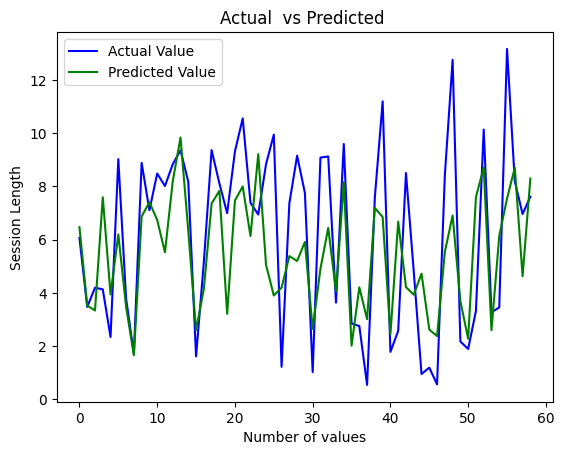

In [78]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual  vs Predicted ')
plt.xlabel('Number of values')
plt.ylabel('Session Length')
plt.legend()
plt.show()

In [79]:
mean_absolute_error(Y_test, test_data_prediction)

2.055230508474576

In [80]:
rms = sqrt(mean_squared_error(Y_test, test_data_prediction))

In [81]:
print(rms)

2.5530136246790014


In [82]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.42804243156138644


In [83]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))


In [84]:
smape_score = smape(Y_test, test_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  41.00750297565185


#SVM 

In [98]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
svr.fit(X_train,Y_train)

SVR(C=10, gamma=0.1)

In [111]:
k=5
kf = KFold(n_splits=k)
scores = cross_val_score(svr, X, Y, cv=kf)

In [112]:
print("Accuracy:", np.mean(scores))

Accuracy: -0.327407307407082


In [113]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)

In [114]:
print(y_pred)

[ 6.06068843  0.74930812  4.94040566  8.96444189  3.06740077  7.50910852
  1.81438464  1.43478326  6.38781749  8.06531971  8.45082991  7.29694642
  8.00305765 10.76871559  5.66366266  1.60952428  4.28436334  5.29897391
  7.90667293  5.20196579  9.16733866  7.24024546  7.64762653 10.42652505
  5.84096658  5.0993704   1.36478724  5.60062292  5.40305115  6.14694985
  1.07020227  7.75880423  5.96797089  2.72541384 11.31253994  1.17609245
  2.8428638   0.83774709  7.20037209  8.6144473   3.2145753   7.4474491
  4.85832944  2.27154491  2.0334488   1.71003916  0.98804311  5.23142907
  9.53900384  3.9627493   0.76844673  8.91044699 11.64315354  2.74180583
  3.61550272  6.11291092  9.37933057  7.2178232  11.50568143]


In [115]:
Y_test = list(Y_test)

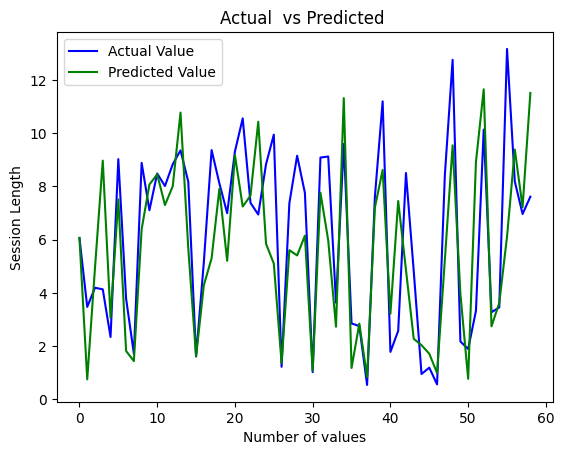

In [116]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual  vs Predicted ')
plt.xlabel('Number of values')
plt.ylabel('Session Length')
plt.legend()
plt.show()

In [117]:
mean_absolute_error(Y_test, y_pred)

1.8162879946293145

In [118]:
rms = sqrt(mean_squared_error(Y_test, y_pred))

In [119]:
print(rms)

2.428334712143846


In [120]:
# R squared error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.4825425522539407


In [121]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score: ", smape_score)

SMAPE score:  34.97896395105777


#XGB

In [122]:
# loading the model
xb_model = XGBRegressor()

In [126]:
k=10
kf = KFold(n_splits=k)
scores = cross_val_score(xb_model, X, Y, cv=kf)

In [127]:
print("Accuracy:", np.mean(scores))

Accuracy: 0.010441604347242872


In [128]:
# training the model with X_train
xb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [129]:
test_prediction = xb_model.predict(X_test)

In [130]:
print(test_prediction)

[ 6.3077583  4.3432145  1.5521593  8.309793   2.7202122  7.2275567
  4.4282255  1.3374788  6.1080728  7.531396   8.543931   6.204812
  7.355279   9.771929   5.0744452  0.6644572  4.0501156  7.352615
  8.782071   1.7831707  8.096593   7.885497   4.062313   9.5156
  5.3649282  3.9492385  4.9269414  5.355741   5.654082   5.5457015
  2.2236662  4.014047   8.553096   4.305997  10.58561    1.9722611
  4.037724   4.140648   7.0572023  8.273492   1.3329695  7.260558
  1.2998586  3.8178704  3.1527944  3.587361   7.018473   5.960291
  8.682178   3.6752837  0.6134096  8.359484  11.064021   2.4062073
  7.7041945  8.400012   7.9376793  3.0426471  8.838589 ]


In [131]:
Y_test = list(Y_test)

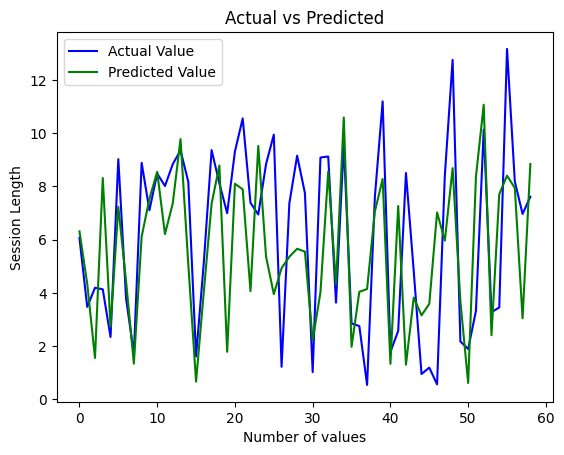

In [132]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('Session Length')
plt.legend()
plt.show()

In [133]:
mean_absolute_error(Y_test, test_prediction)

2.2784406689061956

In [134]:
rms = sqrt(mean_squared_error(Y_test, test_prediction))

In [135]:
print(rms)

2.8713194387458545


In [136]:
# R squared error
error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared error : ", error_score)

R squared error :  0.27652993107473534


In [137]:
smape_score = smape(Y_test, test_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  48.29211538869077


#ANN

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [139]:
# layers
model=Sequential()
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

In [140]:
# Compile the model
model.compile(loss='mean_absolute_error',optimizer='adam')

In [141]:
# Train the model on the training dataset
model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
6/6 [==============================] - 1s 33ms/step - loss: 5.3745 - val_loss: 5.1769
Epoch 2/15
6/6 [==============================] - 0s 7ms/step - loss: 5.3668 - val_loss: 5.1684
Epoch 3/15
6/6 [==============================] - 0s 8ms/step - loss: 5.3576 - val_loss: 5.1579
Epoch 4/15
6/6 [==============================] - 0s 7ms/step - loss: 5.3457 - val_loss: 5.1434
Epoch 5/15
6/6 [==============================] - 0s 7ms/step - loss: 5.3287 - val_loss: 5.1213
Epoch 6/15
6/6 [==============================] - 0s 9ms/step - loss: 5.3018 - val_loss: 5.0847
Epoch 7/15
6/6 [==============================] - 0s 8ms/step - loss: 5.2564 - val_loss: 5.0221
Epoch 8/15
6/6 [==============================] - 0s 8ms/step - loss: 5.1778 - val_loss: 4.9209
Epoch 9/15
6/6 [==============================] - 0s 7ms/step - loss: 5.0455 - val_loss: 4.7516
Epoch 10/15
6/6 [==============================] - 0s 8ms/step - loss: 4.8333 - val_loss: 4.4857
Epoch 11/15
6/6 [=====================

In [73]:
# Use the trained model to make predictions on the test dataset
Y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [74]:
print(Y_pred)

[[6.537935 ]
 [3.3794315]
 [7.0500226]
 [6.5083394]
 [3.7663584]
 [6.9763336]
 [3.2449841]
 [4.766053 ]
 [5.4627714]
 [8.737131 ]
 [6.538011 ]
 [5.891984 ]
 [5.8633184]
 [7.928792 ]
 [5.467697 ]
 [3.2524369]
 [7.8467283]
 [5.9677706]
 [6.341749 ]
 [6.238586 ]
 [6.431058 ]
 [5.508128 ]
 [6.8524995]
 [7.9206767]
 [5.620012 ]
 [6.02147  ]
 [2.6988945]
 [6.5648513]
 [6.440062 ]
 [6.79603  ]
 [3.272563 ]
 [5.4904423]
 [5.7596064]
 [3.5293791]
 [7.82882  ]
 [2.9780731]
 [3.5661829]
 [3.1185923]
 [5.4098144]
 [6.4878464]
 [6.986909 ]
 [5.778661 ]
 [9.061384 ]
 [5.0263286]
 [2.5783453]
 [3.3552766]
 [4.7258286]
 [5.9712095]
 [4.775316 ]
 [3.7240295]
 [3.2048044]
 [6.5647244]
 [7.8313885]
 [3.000465 ]
 [3.4992232]
 [8.78599  ]
 [5.7010336]
 [6.0226564]
 [7.803857 ]]


In [75]:
mean_absolute_error(Y_test, Y_pred)

2.1623703565435894

In [76]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [77]:
print(rms)

2.643604849494429


In [79]:
# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)

R squared error :  0.3867315454576281


In [80]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return np.mean((np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))) * 2) * 100

In [81]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 34.97896395105777


# Ensemble Learning

In [82]:
#stack Regressor
stack_regressor = StackingRegressor(estimators=[('rf', regressor), ('xgb', xb_model)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [83]:
predictions = stack_regressor.predict(X_test)

In [84]:
print(predictions)

[6.20720127 4.10881819 3.00504196 7.58068309 3.60784202 6.58373069
 4.21211814 2.15680474 6.27418239 6.97552494 7.35586742 5.89301161
 6.96269409 8.84544708 5.47451037 2.121858   4.32441493 7.18363634
 7.77041486 3.0583757  7.44470725 7.40056408 5.17131956 8.38752656
 5.20983028 4.10772295 5.08976974 5.23262066 5.29265159 5.61551861
 2.92239617 4.26922849 6.85972953 4.35849101 8.48404961 2.50620593
 4.37907532 3.86772321 6.8461765  7.30391187 2.68212705 6.49346528
 3.60736005 4.3440966  4.62405736 3.50238675 4.73982876 5.56881184
 7.64954509 4.00380335 2.10301596 7.63809543 9.0531132  3.09422428
 6.79996868 7.40450903 7.49193198 4.44404066 8.02190168]


In [85]:
mean_absolute_error(Y_test, predictions)

2.174919249395718

In [86]:
rms = sqrt(mean_squared_error(Y_test, predictions))

In [87]:
print(rms)

2.672469922015007


In [88]:
# R squared error
error_score = metrics.r2_score(Y_test, predictions)
print("R squared error : ", error_score)

R squared error :  0.37326608280018647


In [89]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

In [90]:
smape_score = smape(Y_test, predictions)
print("SMAPE score:", smape_score)

SMAPE score: 43.07223271133626


In [91]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor), ('xgb', xb_model),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                              ('svm', SVR(C=10, gamma=0.1))])

In [92]:
pred=stack_regressor.predict(X_test)

In [93]:
print(pred)

[6.1467075  3.41634188 3.31065093 7.66777538 3.50169175 6.78449193
 3.66475262 2.03775079 6.27062914 7.19910156 7.54127958 6.19804285
 7.33221009 9.38087827 5.58346509 1.99793757 4.31635928 6.66039852
 7.83023577 3.53072962 7.91158186 7.31719688 5.57726064 8.83955351
 5.37440828 4.35516057 4.06138326 5.37407563 5.41250249 5.8243422
 2.63190979 5.40429138 6.78525877 4.09848898 9.28406111 2.28406301
 4.06350616 3.28630062 6.85196921 7.6297865  2.71408054 6.7793428
 3.59939412 3.90122457 3.81762594 3.15154984 4.11374079 5.6969876
 8.05961025 3.9964072  1.80544937 7.87293844 9.74224667 3.03117646
 6.27226506 7.106633   7.77807465 4.98154405 8.72682485]


In [94]:
mean_absolute_error(Y_test, pred)

1.9835571871831834

In [95]:
rms = sqrt(mean_squared_error(Y_test, pred))

In [96]:
print(rms)

2.4986552206463735


In [97]:
# R squared error
error_score = metrics.r2_score(Y_test, pred)
print("R squared error : ", error_score)

R squared error :  0.4521392173391411


In [98]:
smape_score = smape(Y_test, pred)
print("SMAPE score:", smape_score)

SMAPE score: 39.634371475605974


In [99]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('svm', SVR(C=10, gamma=0.1))])

In [100]:
test_pred=stack_regressor.predict(X_test)

In [101]:
print(test_pred)

[6.51813279 2.7751656  3.80572633 7.85885515 3.62902752 6.62189289
 3.17115863 1.98882887 6.73216848 7.25855661 6.78362151 5.97612552
 7.77100693 9.47908804 6.06582479 2.38718675 4.06416131 6.6111497
 7.57786539 3.90726916 7.71519433 7.35148597 6.41287604 8.96872342
 5.24239729 4.4336017  4.18442834 5.14116972 5.03765202 5.87720371
 2.34435252 5.60615149 6.22929066 3.89921983 8.60434742 2.14605804
 4.08378958 2.81335333 6.92937432 7.18298092 2.99109683 6.429592
 4.40002231 3.8540085  4.29071762 2.62672972 2.32923449 5.15127752
 7.89044675 3.96977575 1.86033713 7.86705614 8.94008997 3.1433485
 5.33429421 6.60492445 8.2422888  5.82836755 8.8104681 ]


In [102]:
mean_absolute_error(Y_test, test_pred)

1.9779500653182691

In [103]:
rms = sqrt(mean_squared_error(Y_test, test_pred))

In [104]:
print(rms)

2.4719963368368933


In [105]:
# R squared error
error_score = metrics.r2_score(Y_test, test_pred)
print("R squared error : ", error_score)

R squared error :  0.4637674263171786


In [106]:
smape_score = smape(Y_test, test_pred)
print("SMAPE score:", smape_score)

SMAPE score: 39.40978489483987


In [107]:
voting_reg = VotingRegressor(estimators=[('rf', regressor), ('xb', xb_model)])
voting_reg.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('xb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))])

In [108]:
Y_pred = voting_reg.predict(X_test)

In [109]:
print(Y_pred)

[6.40237917 4.06300726 2.64647965 8.02294674 3.42355611 6.60112835
 3.98366276 1.46608938 6.62948638 7.56994796 7.7616155  5.97630602
 7.68748948 9.81676439 5.53652262 1.3592286  4.15895779 7.60680744
 8.35018556 2.50223535 7.67534645 7.82979855 5.11605654 9.2673501
 5.06791412 3.95876927 4.6609707  5.10257051 5.21479091 5.89760075
 2.4423831  4.50057357 7.57334791 4.26269845 9.19980519 1.82008054
 4.26976201 3.48502394 7.21830117 7.52909593 1.94558477 6.82027906
 2.89867929 4.05913519 4.03874718 3.12078055 4.57978657 5.41319545
 8.11048877 3.64584184 1.13290479 7.93584186 9.70016056 2.62450366
 7.54984727 7.65885601 8.02908965 4.03672356 8.43164436]


In [110]:
mean_absolute_error(Y_test, Y_pred)

2.1170992673122275

In [111]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [112]:
print(rms)

2.657602212216019


In [113]:
# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)

R squared error :  0.38022008315145905


In [114]:
smape_score = smape(Y_test, Y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 42.98339026054143


In [115]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor), ('xgb', xb_model),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('svm', SVR(C=10, gamma=0.1))])

In [116]:
predict = vote_regressor.predict(X_test)

In [117]:
print(predict)

[ 6.34474892  2.70234088  3.13445499  8.34891179  3.29603766  7.10862174
  3.13490339  1.43358734  6.44013008  7.69460521  7.92798697  6.47291949
  7.75364554  9.95508146  5.55533597  1.64869383  4.18772631  6.7769296
  8.23081468  3.43087883  8.30154386  7.73424752  5.97007987  9.62960842
  5.42853161  4.17510298  3.94987621  5.39478798  5.32414432  5.95445045
  2.03552282  5.50268379  6.96112224  3.85197024  9.91575011  1.63508451
  3.78356261  2.58829833  7.25779148  7.90791305  2.29588162  6.94423574
  3.44786267  3.30537176  3.15168105  2.66666675  3.38973875  5.46627333
  8.71879379  3.76261099  1.07918544  8.2766769  10.49365822  2.57470439
  6.20373242  7.24204098  8.58293662  4.98089011  9.46389005]


In [118]:
mean_absolute_error(Y_test, predict)

1.9607309179984589

In [119]:
rms = sqrt(mean_squared_error(Y_test, predict))

In [120]:
print(rms)

2.4575029435256104


In [121]:
# R squared error
error_score = metrics.r2_score(Y_test, predict)
print("R squared error : ", error_score)

R squared error :  0.4700368905869403


In [122]:
smape_score = smape(Y_test, predict)
print("SMAPE score:", smape_score)

SMAPE score: 39.9973710730591


In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [124]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('svm', SVR(C=10, gamma=0.1))])

In [125]:
predicted = vote_regressor.predict(X_test)

In [126]:
print(predicted)

[ 6.33089421  2.08600406  3.91405283  8.30277095  3.56875038  7.21890426
  2.81534232  1.33279163  6.77965874  7.77270985  7.99671496  6.40552321
  7.66337883 10.03120779  6.07168133  2.06641214  4.11598167  6.47368695
  7.83993647  4.21703289  8.27091933  7.66982273  6.93621327  9.59141252
  5.72118329  4.4412852   3.20949362  5.56466146  5.26842557  6.16222492
  1.88000114  6.67335211  6.63413545  3.25435692  9.73596997  1.62529623
  3.4026819   2.05472354  7.25333604  8.19137365  2.97363765  7.03877455
  4.63121472  3.30382245  3.4487244   2.23836958  1.51187155  5.46836453
  8.98690192  3.90437465  1.28272336  8.37867349 10.23577677  2.76600292
  5.27235136  6.71250546  8.88446529  6.1377616   9.91669071]


In [127]:
mean_absolute_error(Y_test, predicted)

1.8126129616101543

In [128]:
rms = sqrt(mean_squared_error(Y_test, predicted))

In [129]:
print(rms)

2.3082814395949276


In [130]:
# R squared error
error_score = metrics.r2_score(Y_test, predicted)
print("R squared error : ", error_score)

R squared error :  0.5324424597786593


In [131]:
smape_score = smape(Y_test, predicted)
print("SMAPE score:", smape_score)

SMAPE score: 37.13203221414592
